***
<font size=+2>ID: **AI-0009**</font><br>
<font size=+2>Submission Date: **11-01-2018**</font>
***

## Abstract:
**"House Prices: Advanced Regression Techniques"**<br>
This Project represents House Price prediction using Advanced Regression Techniques such as ANN's Multilayer Perceptron Regressor(MLPRegressor) or Deep Neural Network with 79 explanatory variables describing almost every aspect of residential homes in Ames, Iowa. The approach to the finalization consists of several segments such as Data Set Analysis, Data Preprocessing, Decision of Algorithm and Model, Decision of Hyper Parameters. A sustainable Model was established through careful analysis of the Data Set as problem specific approach requires probabilistic visualization of Data Set. Data Correlation, Standardization, Feature Engineering, Skewness Reduction and other Preprocessing were implemented to shape the Vanilla/Basic Model for the prediction. Hyper Parameter Tuning framed the Final Model. “Style Guide for Python Code PEP8” was followed as Coding Rule. This Project can be useful for similar Prediction Problems with moderate Fine Tuning. 

## Purpose of the Assignment:
The purpose of this Assignment is to predict the Sales Price for each house. The Assignment explicitly focuses on the Machine Learning Approach to the prediction, Data Preprocessing, Data Cleansing, Missing Data Handling, Outliers Detection and Dropping, Hyper Parameter Tuning and Accuracy Improvement.
***

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) 
{
    return false;
} 
// This code snippet is used to turn off auto scrolling in outputs
// Ignore this snippet as it is not a part of the project

<IPython.core.display.Javascript object>

## 1. Data Set Analysis

### 1.1 Features


Total Data in Train Set: 1460

Missing Values in Train Set:

LotFrontage:259
Alley:1369
MasVnrType:8
MasVnrArea:8
BsmtQual:37
BsmtCond:37
BsmtExposure:38
BsmtFinType1:37
BsmtFinType2:38
Electrical:1
FireplaceQu:690
GarageType:81
GarageYrBlt:81
GarageFinish:81
GarageQual:81
GarageCond:81
PoolQC:1453
Fence:1179
MiscFeature:1406


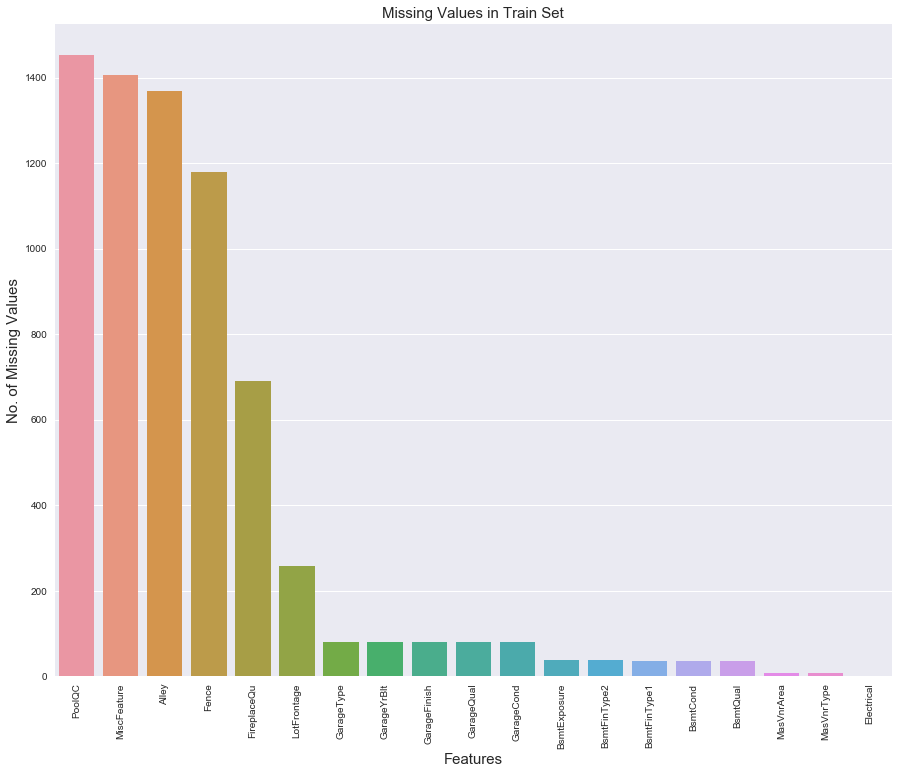

Total Data in Test Set: 1459

Missing Values in Test Set:

MSZoning:4
LotFrontage:227
Alley:1352
Utilities:2
Exterior1st:1
Exterior2nd:1
MasVnrType:16
MasVnrArea:15
BsmtQual:44
BsmtCond:45
BsmtExposure:44
BsmtFinType1:42
BsmtFinSF1:1
BsmtFinType2:42
BsmtFinSF2:1
BsmtUnfSF:1
TotalBsmtSF:1
BsmtFullBath:2
BsmtHalfBath:2
KitchenQual:1
Functional:2
FireplaceQu:730
GarageType:76
GarageYrBlt:78
GarageFinish:78
GarageCars:1
GarageArea:1
GarageQual:78
GarageCond:78
PoolQC:1456
Fence:1169
MiscFeature:1408
SaleType:1


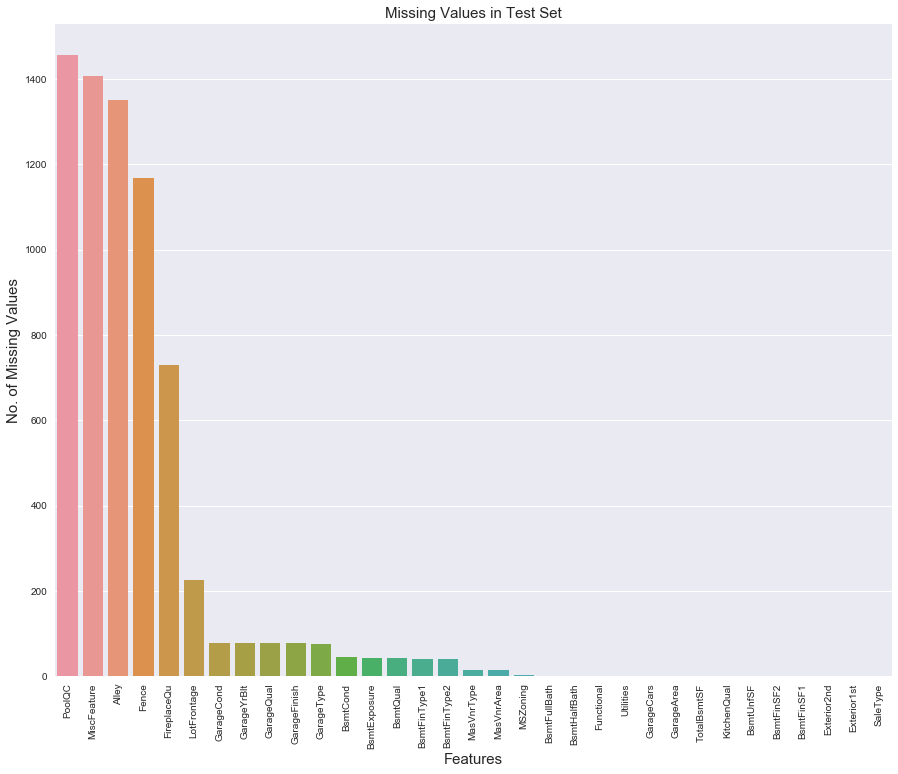

In [2]:
# House Price Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as scst
import scipy.special as scsp

# Data Import
HPtrn = pd.read_csv('train(HP).csv')  # Train Data
HPtst = pd.read_csv('test(HP).csv')  # Test Data

# Missing Values

# Train Set
print('\nTotal Data in Train Set:', len(HPtrn))
Headings = list(HPtst)
print('\nMissing Values in Train Set:\n')
MSx = []
MSy = []
for name in Headings:
    if (HPtrn[name].isnull().sum() > 0):
        print('%s:%d' % (name,HPtrn[name].isnull().sum()))
        MSx = MSx + [name]
        MSy = MSy + [HPtrn[name].isnull().sum()]

df = pd.DataFrame(data={'MSx':MSx, 'MSy':MSy})
df = df.sort_values(by=['MSy'], ascending=False)
plt.figure(1, figsize=(15,12))
sb.barplot(x=df.MSx, y=df.MSy)
plt.xticks(rotation='90')
plt.title('Missing Values in Train Set', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('No. of Missing Values', fontsize=15)
plt.show()

# Test Set
print('Total Data in Test Set:', len(HPtst))
print('\nMissing Values in Test Set:\n')
Headings = list(HPtst)
MSx = []
MSy = []
for name in Headings:
    if (HPtst[name].isnull().sum() > 0):
        print('%s:%d' % (name,HPtst[name].isnull().sum()))
        MSx = MSx + [name]
        MSy = MSy + [HPtst[name].isnull().sum()]

df = pd.DataFrame(data={'MSx':MSx, 'MSy':MSy})
df = df.sort_values(by=['MSy'], ascending=False)
plt.figure(2, figsize=(15,12))
sb.barplot(x=df.MSx, y=df.MSy)
plt.xticks(rotation='90')
plt.title('Missing Values in Test Set', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('No. of Missing Values', fontsize=15)
plt.show()

<h2>Cell Report:</h2><br>
**1.** Number of Missing Values were investigated and graphically represented.<br>
**2.** Though some features like 'PoolQC', 'MiscFeature', 'Alley' and 'Fence' had more than 1000 missing values, they were not dropped because those missing values indicate a meaning and can be categorized(One Hot Encoded) or Label Encoded. 

### 1.2 Target Variable


mu(Mean): 180921.196
sigma(Standard Deviation): 79415.292
Mode: 140000


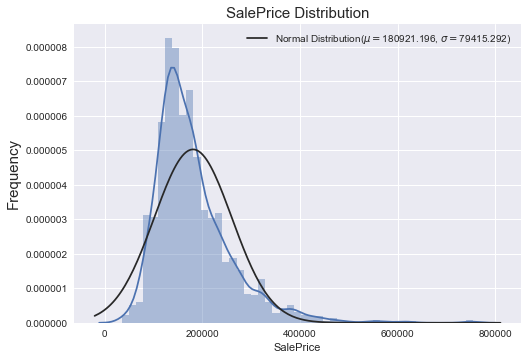

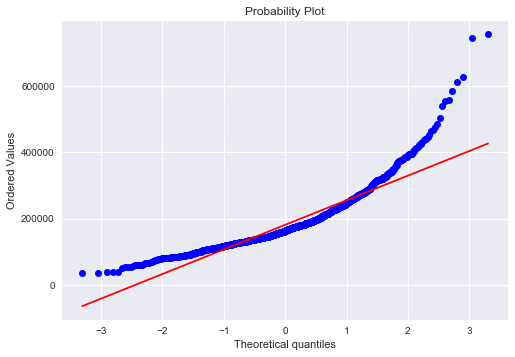

Skewness: 1.88288
Kurtosis: 6.53628


In [3]:
# Mean, Standard Deviation and Mode
(mu, sigma) = scst.norm.fit(HPtrn['SalePrice'])
mu = round(mu,3)
sigma = round(sigma,3)
mode = int(HPtrn['SalePrice'].mode())
print('\nmu(Mean):', mu)
print('sigma(Standard Deviation):', sigma)
print('Mode:', mode)

# Skewness of Target Variable
plt.figure(3)
sb.distplot(HPtrn['SalePrice'] , fit=scst.norm)
plt.title('SalePrice Distribution', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(['Normal Distribution($\mu=$%.3f, $\sigma=$%.3f)' % (mu,sigma)], loc='best')
plt.show()

# Probability Plot(Similar to Quantile-Quantile Plot)
plt.figure(4)
scst.probplot(HPtrn['SalePrice'], plot=plt)
plt.show()

# Skewness and Kurtosis
print('Skewness: %.5f' % HPtrn['SalePrice'].skew())
print('Kurtosis: %.5f' % HPtrn['SalePrice'].kurt())

<h2>Cell Report:</h2><br>
**1.** Skewness of the Target Variable was graphically represented and it was found to be right(positive) skewed. This is verified by the fact that the Mean of the Distribution is greater than the Mode.<br>
**2.** The Probability Plot(Similar to Q-Q Plot) also verifies the right skewness of Target Variable. Considering the Standard Deviation, the Random Variables that fall outside (-3,3) are potential outliers.<br> 
**3.** Kurtosis indicates the peakiness of the distribution. 

### 1.3 Data Correlation

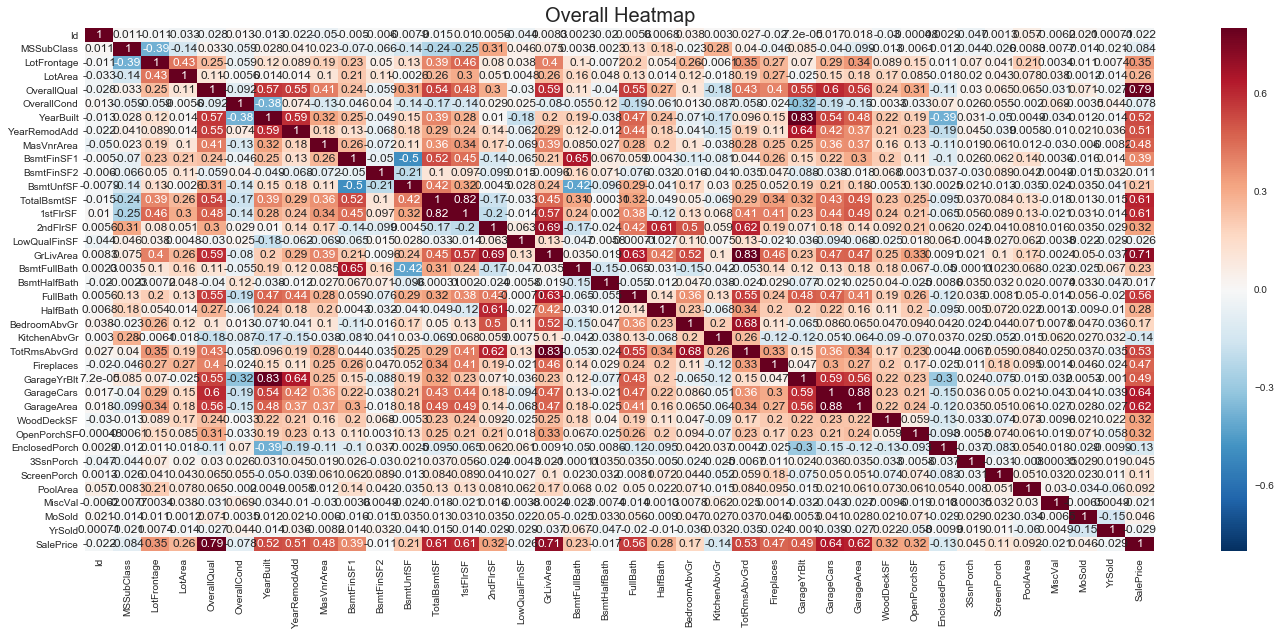

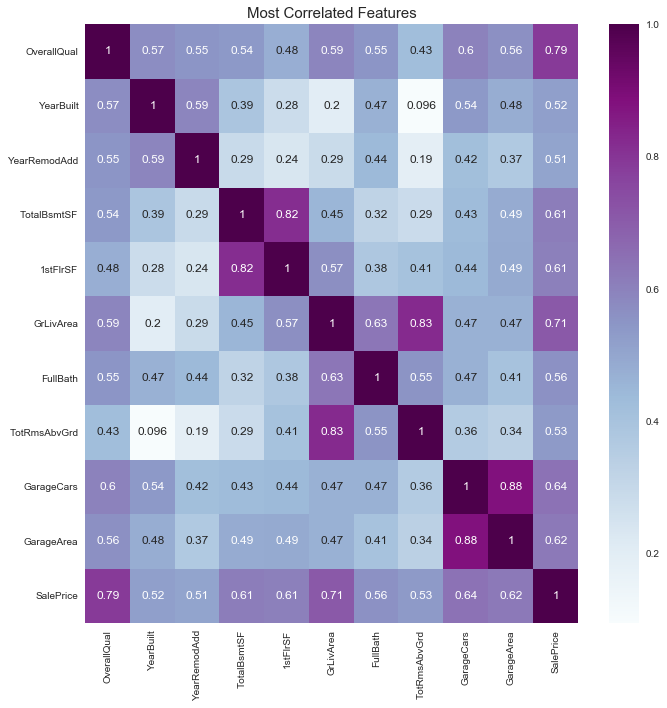

Most Correlated Features with Target Variable:

OverallQual
YearBuilt
YearRemodAdd
TotalBsmtSF
1stFlrSF
GrLivArea
FullBath
TotRmsAbvGrd
GarageCars
GarageArea


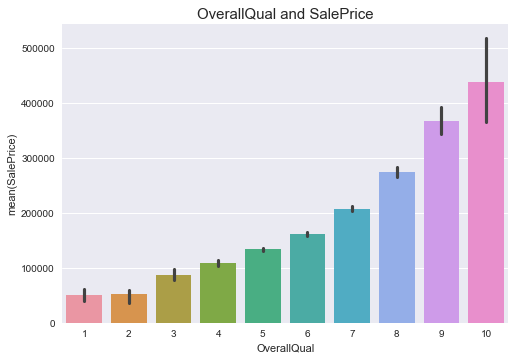

In [4]:
# Correlation Matrix
CMtx = HPtrn.corr()
plt.figure(5, figsize=(20, 9))
sb.heatmap(CMtx, vmax=0.8, annot=True)  # Heatmap
plt.title('Overall Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

# Most Correlated Features
MCF = CMtx.index[abs(CMtx['SalePrice']) > 0.5]  # Features that have a correlation greater than 0.5 with the Target Variable
plt.figure(6, figsize=(10,10))
sb.heatmap(HPtrn[MCF].corr(), annot=True, cmap='BuPu')
plt.title('Most Correlated Features', fontsize=15)
plt.tight_layout()
plt.show()

# Listing
MCFL = list(MCF)
MCFL.remove('SalePrice')
print('Most Correlated Features with Target Variable:\n')
for name in MCFL:
    print(name)

# Investigating 'OverallQual'
plt.figure(7)
sb.barplot(x=HPtrn.OverallQual, y=HPtrn.SalePrice)
plt.title('OverallQual and SalePrice', fontsize=15)
plt.show()

<h2>Cell Report:</h2><br>
**1.** Heatmap and the most Correlated Features with the Target variable were represented with the Correlation Matrix.<br>
**2.** Some Features that have a high Correlation(>0.8):<br>
   'GarageCars' and 'GarageArea'  : 0.88          
   'GrLivArea' and 'TotRmsAbvGrd' : 0.83<br>
   'YearBuilt' and 'GarageYrBlt'  : 0.83<br>
   'TotalBsmtSF' and '1stFlrSF'   : 0.82<br>
**3.** 'OverallQual' is highly correlated(0.79) with the Target Variable 'SalePrice' which was shown in the barplot.<br>
**4.** These are some important observations which can be exploited later on. 

### 1.4 Visualization


Scatter Plots


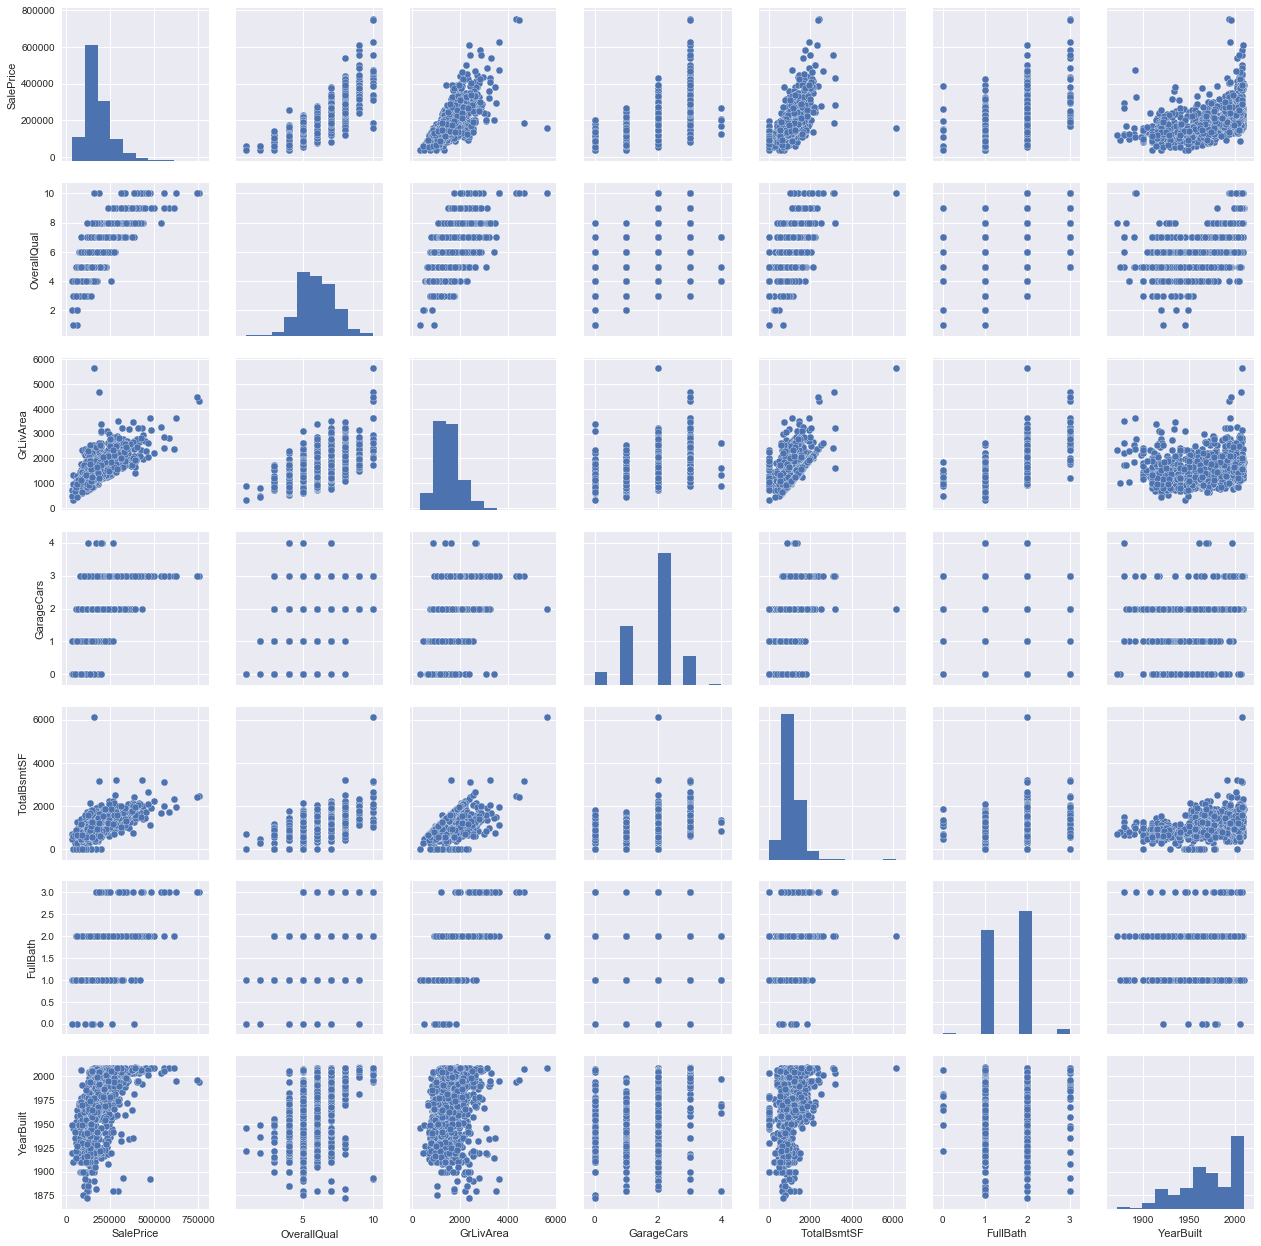

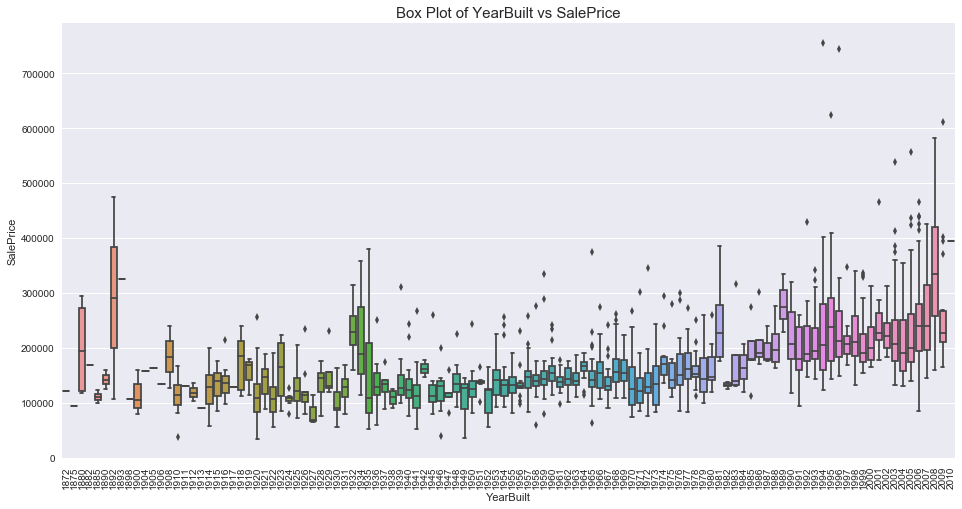

In [5]:
# Scatter Plots between 'SalePrice' and Correlated Variables
print('\nScatter Plots')
sb.set()
CorF = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']  # Correlated Features
sb.pairplot(HPtrn[CorF], size = 2.5)
plt.show()

# Box Plot between 'YearBuilt' and 'SalePrice'
plt.figure(8, figsize=(16, 8))
sb.boxplot(x=HPtrn['YearBuilt'], y=HPtrn['SalePrice'])
plt.xticks(rotation=90)
plt.title('Box Plot of YearBuilt vs SalePrice', fontsize=15)
plt.show()

<h2>Cell Report:</h2><br>
**1.** Scatter Plot and Box Plot were represented to show how the most effective Features are correlated with the Target Variable.<br> 
**2.** 'OverallQual' is strongly related with 'SalePrice'.<br>
**3.** 'GrLivArea' and 'TotalBsmtSF' seem to be somewhat linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', the slope of the linear relationship is particularly high.<br>
**4.** 'SalePrice' is more prone to increase in recent years as seen from SalePrice vs YearBuilt Boxplot.<br>
**5.** Information about Outliers are visible in these plots which can be exploited later on. 

## 2. Data Preprocessing

### 2.1 Data Cleansing

In [6]:
# Column Treatment(Id Dropping)
HPtrn = HPtrn.drop('Id', axis=1)
Id = HPtst['Id']  # The 'Id' column of Test Data is needed for final submission
HPtst = HPtst.drop('Id', axis=1)

# Numerical and Non-Numerical Data Observation
Headings = list(HPtrn)
NumData = HPtrn._get_numeric_data().columns
NumData = list(NumData)
NumData.remove('MSSubClass')  # 'MSSubClass' is a categorical data
CatData = []
for name in Headings:
    if(name not in NumData):
        CatData = CatData+[name]
for name in CatData:
    print('\n', pd.value_counts(HPtrn[name]))

print('\nUtilities column in the Test Set:')
print(pd.value_counts(HPtst['Utilities']))

# Column Treatment(Utilities Dropping)
HPtrn = HPtrn.drop('Utilities', axis=1)
HPtst = HPtst.drop('Utilities', axis=1)


 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

 Pave    1454
Grvl       6
Name: Street, dtype: int64

 Grvl    50
Pave    41
Name: Alley, dtype: int64

 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitch

<h2>Cell Report:</h2><br>
**1.** 'Id' column was dropped as it would not contribute to the prediction accuracy.<br> 
**2.** Based on the investigation shown above, 'Utilities' column was dropped as it has a count value split of 1459 to 1 in the Train Set. For this categorical feature, all values are 'AllPub' except for one 'NoSeWa' in the Train Set and 2 NA in the Test Set. It also would not contribute to the prediction accuracy. 

### 2.2 Missing Data Processing

In [7]:
# Column Treatment(Missing Data Handling)

# Filling with 'None'
NoneCols = ['MiscFeature', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass', 'Alley']

for name in NoneCols:
    HPtrn[name] = HPtrn[name].fillna('None')
    HPtst[name] = HPtst[name].fillna('None')

# Filling with 0
OCols = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 
         'BsmtHalfBath', 'MasVnrArea', 'MasVnrArea']

for name in OCols:
    HPtrn[name] = HPtrn[name].fillna(0)
    HPtst[name] = HPtst[name].fillna(0)

# Filling with Mode
MCols = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']

for name in MCols:
    HPtrn[name] = HPtrn[name].fillna(HPtrn[name].mode()[0])
    HPtst[name] = HPtst[name].fillna(HPtst[name].mode()[0])

# Filling with Median
HPtrn['LotFrontage'] = HPtrn.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
HPtst['LotFrontage'] = HPtst.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Filling with 'Typ'
HPtst['Functional'] = HPtst['Functional'].fillna('Typ')

# Check if Missing Values are still present
if(HPtrn.isnull().sum().sum() == 0 and HPtst.isnull().sum().sum() == 0):
    print('\nNo Missing Values found')
else:
    print('\nMissing Values are still present')


No Missing Values found


<h2>Cell Report:</h2><br>
**1.** Missing Values were handled according to the Data Description provided with the Data Set.<br> 
**2.** Some Missing Values were filled by 'None' because NA means that the instance lacks that Feature.<br> 
**3.** Some Missing Values were filled by 0 because NA means that the instance has 0 capacity for that Feature.<br> 
**4.** Some Missing Values were filled by mode because the instances must be categorized into one of the Feature Values. The best way to do so is by filling them by the most frequent/common value.<br>
**5.** Missing Values in the 'LotFrontage' column were filled by the median of the same Neighborhood's LotFrontage since the area of each street connected to the house property most likely has a similar area to other houses in its Neighborhood. This was effectively done by Pandas groupby method. 'LotFrontage' column was grouped by 'Neighborhood' and Missing Values were filled by the median of that group.<br> 
**6.** Missing Values in the 'Functional' column were filled by 'Typ' according to the Data Description as it says 'Assume typical unless deductions are warranted'.

### 2.3 Outliers Processing

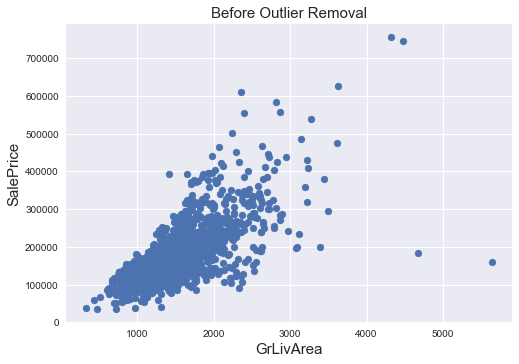

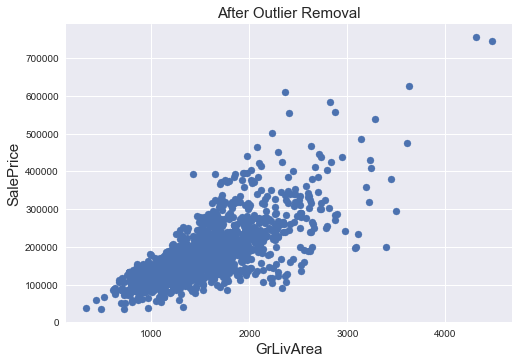

In [8]:
# Outlier Detection
plt.figure(9)
plt.scatter(x=HPtrn['GrLivArea'], y=HPtrn['SalePrice'])
plt.title('Before Outlier Removal', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.show()

# Outlier Removal
HPtrn = HPtrn.drop(HPtrn[(HPtrn['GrLivArea']>4000) & (HPtrn['SalePrice']<300000)].index)
HPtrn = HPtrn.reset_index()
HPtrn = HPtrn.drop('index', axis=1)

# Cleaned Data
plt.figure(10)
plt.scatter(x=HPtrn['GrLivArea'], y=HPtrn['SalePrice'])
plt.title('After Outlier Removal', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.show()

<h2>Cell Report:</h2><br>
**1.** Documentation for the Ames Housing Data indicates that there are Outliers present in the Training Data.<br>
**2.** In the first Scatter Plot, at the bottom right, there are two instances with extremely large GrLivArea(>4000) that are 
of a very low SalePrice of less than 300000. These are huge Oultliers. So, they were deleted.<br>
**3.** There are probably other Outliers in the Training Data. However, removing all of them may badly affect the models if ever there were also Outliers in the Test Data. That's why , instead of removing them all, the models should be made robust on them.

### 2.4 Data Normalization / Standardization


mu(Mean): 12.024
sigma(Standard Deviation): 0.4
Mode: 11


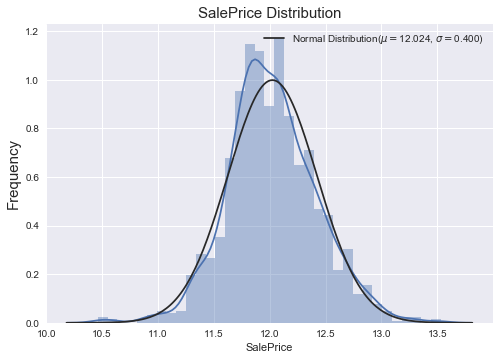

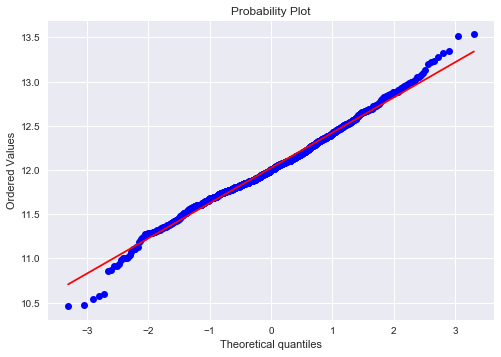

Skewness: 0.12158
Kurtosis: 0.80475

Z-Score: [ 0.55980367  0.21272885  0.73366822 ...,  1.17404058 -0.39928824
 -0.30638728]


In [9]:
# Log Transformation of the Target Variable
HPtrnY = HPtrn['SalePrice']  # Saving the Original Target Values
HPtrn['SalePrice'] = np.log1p(HPtrn['SalePrice'])

# New Distribution

# Mean, Standard Deviation and Mode
(mu, sigma) = scst.norm.fit(HPtrn['SalePrice'])
mu = round(mu,3)
sigma = round(sigma,3)
mode = int(HPtrn['SalePrice'].mode())
print('\nmu(Mean):', mu)
print('sigma(Standard Deviation):', sigma)
print('Mode:', mode)

# Skewness of Target Variable
plt.figure(11)
sb.distplot(HPtrn['SalePrice'] , fit=scst.norm)
plt.title('SalePrice Distribution', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(['Normal Distribution($\mu=$%.3f, $\sigma=$%.3f)' % (mu,sigma)], loc='best')
plt.show()

# Probability Plot(Similar to Quantile-Quantile Plot)
plt.figure(12)
scst.probplot(HPtrn['SalePrice'], plot=plt)
plt.show()

# Skewness and Kurtosis
print('Skewness: %.5f' % HPtrn['SalePrice'].skew())
print('Kurtosis: %.5f' % HPtrn['SalePrice'].kurt())

# Z-Score
HPtrnYZ = scst.zscore(HPtrn['SalePrice'])
print('\nZ-Score:', HPtrnYZ)

<h2>Cell Report:</h2><br>
**1.** Log Transformation was applied to the Target Variable because of its high skewness.<br>
**2.** Log Transformation greatly reduced the Skewness of the Target Variable.<br> 
**3.** The Kurtosis was also reduced.<br>
**4.** The Distribution Plot and The Probability Plot verify the conclusion. The difference between the previous two Plots and Log Transformation Plots is clearly visible. The Data now appears more Normally Distributed.<br>
**5.** Z-Score was also represented.

### 2.5 Feature Engineering

In [10]:
import sklearn.preprocessing as skpp

# Saving the Raw Cleaned Data
HPtrnFE = HPtrn.copy()
HPtstFE = HPtst.copy()

# Listing Most Important Features
print('\nMost important features relative to Target:\n')
CMtx = HPtrnFE.corr()
CMtx.sort_values(['SalePrice'], ascending = False, inplace = True)
print(CMtx['SalePrice'][abs(CMtx['SalePrice']) >= 0.1])

# Column Treatment(Adding New Features)
HPtrnFE['HsAge'] = HPtrnFE['YrSold'] - HPtrnFE['YearBuilt']
HPtstFE['HsAge'] = HPtstFE['YrSold'] - HPtstFE['YearBuilt']
HPtrnFE['TotalSF'] = HPtrnFE['TotalBsmtSF'] + HPtrnFE['1stFlrSF'] + HPtrnFE['2ndFlrSF']
HPtstFE['TotalSF'] = HPtstFE['TotalBsmtSF'] + HPtstFE['1stFlrSF'] + HPtstFE['2ndFlrSF']

# Column Treatment(Numerical to Categorial)
HPtrnFE['MSSubClass'] = HPtrnFE['MSSubClass'].apply(str)
HPtstFE['MSSubClass'] = HPtstFE['MSSubClass'].apply(str)
HPtrnFE['OverallCond'] = HPtrnFE['OverallCond'].astype(str)
HPtstFE['OverallCond'] = HPtstFE['OverallCond'].astype(str)
HPtrnFE['MoSold'] = HPtrnFE['MoSold'].astype(str)   
HPtstFE['MoSold'] = HPtstFE['MoSold'].astype(str)

# Column Treatment(Label Encoding of Ordinal Data)
OrdCols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'Street', 'GarageCond', 'ExterQual', 'ExterCond', 'HeatingQC',
           'MoSold', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure',
           'GarageFinish', 'LandSlope', 'Alley', 'PavedDrive', 'GarageQual', 'CentralAir', 'OverallCond', 'MSSubClass', 
           'LotShape', 'YrSold')

for column in OrdCols:
    # Train
    lbl = skpp.LabelEncoder() 
    lbl.fit(list(HPtrnFE[column].values))
    HPtrnFE[column] = lbl.transform(list(HPtrn[column].values))
    # Test
    lbl = skpp.LabelEncoder() 
    lbl.fit(list(HPtstFE[column].values))
    HPtstFE[column] = lbl.transform(list(HPtst[column].values))
    
# Most Skewed Features
NumF = HPtrnFE.dtypes[HPtrnFE.dtypes != 'object'].index
NumF = NumF.drop('SalePrice')

# Skewness of Numerical Features(Train)
SkewedFtrn = HPtrnFE[NumF].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness in Numerical Features(Train): \n")
df = pd.DataFrame({'Skewness' : SkewedFtrn})
print(df.head(15))

# Skewness of Numerical Features(Test)
SkewedFtst = HPtstFE[NumF].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness in Numerical Features(Test): \n")
df = pd.DataFrame({'Skewness' : SkewedFtst})
print(df.head(15))

# Column Treatment(Box Cox Transformation of Highly Skewed Features)
Tolerance = 0.2  # Tolerance of Skewness
BoxF = list(SkewedFtrn[abs(SkewedFtrn) > Tolerance].index) + list(SkewedFtst[abs(SkewedFtst) > Tolerance].index)
BoxF = list(set(BoxF))
Lam = 0.15  #  Hyperparameter of Box Cox Transformation
for name in BoxF:
    HPtrnFE[name] = scsp.boxcox1p(HPtrnFE[name], Lam)
    HPtstFE[name] = scsp.boxcox1p(HPtstFE[name], Lam)


Most important features relative to Target:

SalePrice        1.000000
OverallQual      0.821405
GrLivArea        0.725211
GarageCars       0.681033
GarageArea       0.656129
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
Fireplaces       0.491998
MasVnrArea       0.430570
BsmtFinSF1       0.392283
LotFrontage      0.369701
GarageYrBlt      0.349013
WoodDeckSF       0.334251
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
LotArea          0.260544
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209035
ScreenPorch      0.121245
KitchenAbvGr    -0.147534
EnclosedPorch   -0.149029
Name: SalePrice, dtype: float64

Skewness in Numerical Features(Train): 

                Skewness
MiscVal        24.460085
PoolArea       15.948945
LotArea        12.573925
3SsnPorch      10.297106
LowQualFinSF    9.004955
LandSlope       4.809982
Kit

***

**Feature Dropping(Exclusive Cell)**

In [11]:
# This Cell is exclusively dedicated to Manual Feature Dropping for Performance Tuning
DF = list(CMtx.index[abs(CMtx['SalePrice']) < 0.02])
HPtrnFE.drop(DF, axis=1, inplace=True)
HPtstFE.drop(DF, axis=1, inplace=True)

**Note:** Features that have a very low Correlation with the Target Variable were dropped. 

***

In [12]:
# Merging all the Data
HPtrnFEY = HPtrnFE['SalePrice']
HPtrnFE = HPtrnFE.drop('SalePrice', axis=1)
HPdataFE = pd.concat((HPtrnFE, HPtstFE)).reset_index(drop=True)

# Column Treatment(One Hot Encoding of Categorical Data)
HPdataFE = pd.get_dummies(HPdataFE)
print('\nShape of Data:')
print(HPdataFE.shape)

# Data Separation
HPtrnFinalX = HPdataFE[:1458]
HPtstFinalX = HPdataFE[1458:]
HPtstFinalX = HPtstFinalX.reset_index().drop('index', axis=1)


Shape of Data:
(2917, 219)


<h2>Cell Report:</h2><br>
**1.** Most Important Features were represented again. A slight improvement in the Correlation is visible after Outlier Removal.<br>
**2.** Two New Features 'HsAge' and 'TotalSF' were added. 'HsAge' is House Age extracted from the information of the Year the House was built and the Year the House was sold. 'TotalSF' is Total Square Feet area.<br> 
**3.** Some Features were converted to Categorical.<br>
**4.** Ordinal Data were Label Encoded.<br>
**5.** Highly Skewed Numerical Features were treated by Box Cox Transformation to reduce the Skewness.<br>
**6.** Categorical Data were One Hot Encoded.<br>
**7.** 'BsmtFinSF2' and 'BsmtHalfBath' columns were dropped based on their very low Correlation with the Target Variable which improved the Final Score.

## 3. Decision of Algorithm and Model

### 3.1 Scikit Learn(ANN)

In [13]:
# Learner(Vanilla/Basic Model)
import sklearn.neural_network as sknn
import sklearn.model_selection as mods
import warnings
warnings.filterwarnings('ignore')

rgr = sknn.MLPRegressor(hidden_layer_sizes=(300,200,100), activation='identity', solver='adam', alpha=1)
CVS = mods.cross_val_score(rgr, HPtrnFinalX, HPtrnFEY, cv=5)  # Cross Validation Scores
rgr = rgr.fit(HPtrnFinalX, HPtrnFEY)
PredSKlog1p = rgr.predict(HPtstFinalX)
print('\nAverage Accuracy(R2) Score(5 Fold Cross Validation):', sum(CVS)/5)

# Inverse log1p Transformation
PredSKHP = np.exp(PredSKlog1p).flatten()
PredSKHP = pd.DataFrame({'Id':Id, 'SalePrice':PredSKHP})
PredSKHP['SalePrice'] = PredSKHP['SalePrice'].transform(lambda x: (x-1))

# CSV File(Kaggle Format)
PredSKHP.to_csv('PredSKHP(Vanilla).csv', index=False)


Average Accuracy(R2) Score(5 Fold Cross Validation): 0.905209922984


<h2>Cell Report:</h2><br>
**1.** A Vanilla/Basic Model was represented with Neural Network. Scikit Learn's ANN was used for this Traditional Model. Hyper Parameters were tuned manually.<br>
**2.** A 5 Fold Cross Validation was run on the Train Data and the Average Accuracy Score(R2 Score) was shown.<br>
**3.** Kaggle Score: 0.13181

### 3.2 Keras(Deep Models)

Using TensorFlow backend.



Loss(Based on Validation Set): 0.000132158982001


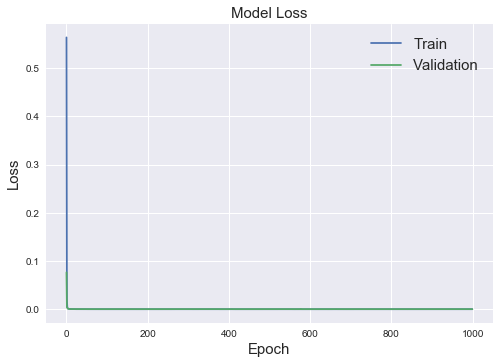

In [14]:
# Learner(Vanilla/Basic Model)
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()

# Stack of Layers
model1.add(Dense(units=300, activation='relu', input_dim=219))
model1.add(Dense(units=200, activation='relu'))
model1.add(Dense(units=1, activation='relu'))

model1.compile(loss='mean_squared_logarithmic_error',
               optimizer='adam') 

# Training of Model(Train Data is splitted into 80/20)
Xtrn, Xvalid, Ytrn, Yvalid = mods.train_test_split(HPtrnFinalX, HPtrnFEY, test_size=0.2)   
kMod = model1.fit(Xtrn, Ytrn, validation_split=0.2, epochs=1000, batch_size=54, verbose=0)
Error = model1.evaluate(Xvalid, Yvalid, batch_size=54, verbose=0)
print('\nLoss(Based on Validation Set):', Error)

# Epoch History
plt.figure(13)
plt.plot(kMod.history['loss'], label='Train')
plt.plot(kMod.history['val_loss'], label='Validation')
plt.title('Model Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.show()

# Training of Model(All the Train Data are fitted to the Model)
model1.fit(HPtrnFinalX, HPtrnFEY, validation_split=0.2, epochs=1000, batch_size=54, verbose=0)
Predlog1p = model1.predict(HPtstFinalX, batch_size=54)  # log1p Transformed Predictions

# Inverse log1p Transformation
PredHP = np.exp(Predlog1p).flatten()
PredHP = pd.DataFrame({'Id':Id, 'SalePrice':PredHP})
PredHP['SalePrice'] = PredHP['SalePrice'].transform(lambda x: (x-1))

# CSV File(Kaggle Format)
PredHP.to_csv('PredHP(Vanilla).csv', index=False)

<h2>Cell Report:</h2><br>
**1.** For Deep Models, Keras was used with TensorFlow backend.<br>
**2.** 'mean_squared_logarithmic_error' was used as loss function.<br>
**3.** This is a Vanilla/Basic Model. So, Hyperparameters and Layers were chosen randomly.<br>
**4.** First the Train Data was fitted to the Model with a 80/20 split for Train/Validation to check for Over Fitting. Then all the Train Data were fitted to the Model and Predictions were Inverse log1p Transformed.<br>
**5.** Kaggle Score: 0.16270<br>

### 3.3 Number of Layers

In [15]:
# Learner(Model:2)
model2 = Sequential()

# Stack of Layers
model2.add(Dense(units=300, activation='relu', input_dim=219))
model2.add(Dense(units=200, activation='relu'))
model2.add(Dense(units=100, activation='relu'))
model2.add(Dense(units=1, activation='relu'))

model2.compile(loss='mean_squared_logarithmic_error',
               optimizer='adam') 

# Training of Model(All the Train Data are fitted to the Model)
model2.fit(HPtrnFinalX, HPtrnFEY, validation_split=0.2, epochs=1000, batch_size=54, verbose=0)
Predlog1p = model2.predict(HPtstFinalX, batch_size=54)  # log1p Transformed Predictions

# Inverse log1p Transformation
PredHP = np.exp(Predlog1p).flatten()
PredHP = pd.DataFrame({'Id':Id, 'SalePrice':PredHP})
PredHP['SalePrice'] = PredHP['SalePrice'].transform(lambda x: (x-1))

# CSV File(Kaggle Format)
PredHP.to_csv('PredHP(M2).csv', index=False)

<h2>Cell Report:</h2><br>
**1.** Various combinations of Layers were attempted and the best was found to be (300, 200, 100, 1).<br>
**2.** A Thumb Rule recommended by *Geoff Hinton* was applied for choosing the best number of Hidden Layers.<br> 
**3.** Number of Neurons on each Layer was also tuned according to the Thumb Rule that says, 'Number of Neurons on each Layer should be somewhere between the size of the input and output layer, potentially the mean'.<br>
**4.** Kaggle Score: 0.14690

### 3.4 Regularization

In [16]:
# Learner(Model:3)
from keras import regularizers

model3 = Sequential()

# Stack of Layers
model3.add(Dense(units=300, activation='relu', kernel_regularizer=regularizers.l2(.25), input_dim=219)) # Regularization
model3.add(Dense(units=200, activation='relu'))
model3.add(Dense(units=100, activation='relu'))
model3.add(Dense(units=1, activation='relu'))

model3.compile(loss='mean_squared_logarithmic_error',
               optimizer='adam') 

# Training of Model(All the Train Data are fitted to the Model)
model3.fit(HPtrnFinalX, HPtrnFEY, validation_split=0.2, epochs=1000, batch_size=54, verbose=0)
Predlog1p = model3.predict(HPtstFinalX, batch_size=54)  # log1p Transformed Predictions

# Inverse log1p Transformation
PredHP = np.exp(Predlog1p).flatten()
PredHP = pd.DataFrame({'Id':Id, 'SalePrice':PredHP})
PredHP['SalePrice'] = PredHP['SalePrice'].transform(lambda x: (x-1))

# CSV File(Kaggle Format)
PredHP.to_csv('PredHP(M3).csv', index=False)

<h2>Cell Report:</h2><br>
**1.** Various Regularization Techniques(L1, L2) were used but Final Score did not improve, rather it worsened. Therefore, Regularizers were not added to the Dense Layers of the later Models.  

### 3.5 Dropout

In [17]:
# Learner(Model:4)
from keras.layers import Dropout 
from keras.constraints import maxnorm
model4 = Sequential()

# Stack of Layers
model4.add(Dense(units=300, activation='relu', kernel_constraint=maxnorm(3), input_dim=219))
model4.add(Dropout(0.01))
model4.add(Dense(units=200, activation='relu'))
model4.add(Dropout(0.01))
model4.add(Dense(units=100, activation='relu'))
model4.add(Dense(units=1, activation='relu'))

model4.compile(loss='mean_squared_logarithmic_error',
               optimizer='adam') 

# Training of Model(All the Train Data are fitted to the Model)
model4.fit(HPtrnFinalX, HPtrnFEY, validation_split=0.2, epochs=1000, batch_size=54, verbose=0)
Predlog1p = model4.predict(HPtstFinalX, batch_size=54)  # log1p Transformed Predictions

# Inverse log1p Transformation
PredHP = np.exp(Predlog1p).flatten()
PredHP = pd.DataFrame({'Id':Id, 'SalePrice':PredHP})
PredHP['SalePrice'] = PredHP['SalePrice'].transform(lambda x: (x-1))

# CSV File(Kaggle Format)
PredHP.to_csv('PredHP(M4).csv', index=False)

<h2>Cell Report:</h2><br>
**1.** Numerous values of Dropout were attempted combined with a Weight Constraint but it did not contribute to improving the Final Score.<br>
**2.** Tuning the Number of Epochs might be a possible solution for handling the Overfitting problem. This investigation was represented in the later Models.   

### 3.6 Batch Normalization

In [18]:
# Learner(Model:5)
from keras.layers import BatchNormalization 
model5 = Sequential()

# Stack of Layers
model5.add(Dense(units=300, activation='relu', input_dim=219))
model5.add(BatchNormalization())
model5.add(Dense(units=200, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dense(units=100, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dense(units=1, activation='relu'))

model5.compile(loss='mean_squared_logarithmic_error',
               optimizer='adam') 

# Training of Model(All the Train Data are fitted to the Model)
model5.fit(HPtrnFinalX, HPtrnFEY, validation_split=0.2, epochs=1000, batch_size=54, verbose=0)
Predlog1p = model5.predict(HPtstFinalX, batch_size=54)  # log1p Transformed Predictions

# Inverse log1p Transformation
PredHP = np.exp(Predlog1p).flatten()
PredHP = pd.DataFrame({'Id':Id, 'SalePrice':PredHP})
PredHP['SalePrice'] = PredHP['SalePrice'].transform(lambda x: (x-1))

# CSV File(Kaggle Format)
PredHP.to_csv('PredHP(M5).csv', index=False)

<h2>Cell Report:</h2><br>
**1.** Batch Normalization was applied to each of the Hidden Layers which improved the Final Score.<br>
**2.** Kaggle Score: 0.13876

## 4. Decision of Hyper Parameters

### 4.1 Epochs

In [19]:
# Learner(Model:6)
np.random.seed(25)
model6 = Sequential()

# Stack of Layers
model6.add(Dense(units=300, activation='relu', input_dim=219))
model6.add(BatchNormalization())
model6.add(Dense(units=200, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dense(units=100, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dense(units=1, activation='relu'))

model6.compile(loss='mean_squared_logarithmic_error',
               optimizer='adam') 

# Training of Model(All the Train Data are fitted to the Model)
model6.fit(HPtrnFinalX, HPtrnFEY, validation_split=0.2, epochs=3500, batch_size=54, verbose=0)
Predlog1p = model6.predict(HPtstFinalX, batch_size=54)  # log1p Transformed Predictions

# Inverse log1p Transformation
PredHP = np.exp(Predlog1p).flatten()
PredHP = pd.DataFrame({'Id':Id, 'SalePrice':PredHP})
PredHP['SalePrice'] = PredHP['SalePrice'].transform(lambda x: (x-1))

# CSV File(Kaggle Format)
PredHP.to_csv('PredHP(M6).csv', index=False)

<h2>Cell Report:</h2><br>
**1.** Epochs were tuned manually. Best Score was found for 3500 Epochs.<br>
**2.** Kaggle Score: 0.13044

### 4.2 Activation Function(Grid Search)

In [20]:
# Grid Search for the best Activation Function
from sklearn.model_selection import GridSearchCV

# Available Activation Functions
Activations = ['identity', 'logistic', 'tanh', 'relu']

# Model to Grid Search
model = sknn.MLPRegressor(hidden_layer_sizes=(300,200,100), alpha=1)
grid = GridSearchCV(estimator=model, param_grid=dict(activation = Activations))
grid.fit(HPtrnFinalX, HPtrnFEY)
print('\nGrid Summary:\n', grid)

# Summary(Tuned Hyperparameter)
print('\nBest Score(R2):', grid.best_score_)
print('Best Activation Function:', grid.best_estimator_.activation)


Grid Summary:
 GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 200, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best Score(R2): 0.89748670644
Best Activation Function: identity


<h2>Cell Report:</h2><br>
**1.** Grid Search was run and best Activation Function was found to be 'identity'. 

### 4.3 Optimizer(Grid Search)

In [21]:
# Grid Search for the best Optimizer

# Available Optimizers
Optimizers = ['lbfgs', 'sgd', 'adam']

# Model to Grid Search
model = sknn.MLPRegressor(hidden_layer_sizes=(300,200,100), alpha=1)
grid = GridSearchCV(estimator=model, param_grid=dict(solver = Optimizers))
grid.fit(HPtrnFinalX, HPtrnFEY)
print('\nGrid Summary:\n', grid)

# Summary(Tuned Hyperparameter)
print('\nBest Score(R2):', grid.best_score_)
print('Best Optimizer:', grid.best_estimator_.solver)


Grid Summary:
 GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 200, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'solver': ['lbfgs', 'sgd', 'adam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best Score(R2): 0.891195141995
Best Optimizer: adam


<h2>Cell Report:</h2><br>
**1.** Grid Search was run and best Optimizer was found to be 'adam'.

### 4.4 Learning Rate(Grid Search)

In [22]:
# Grid Search for the best Learning Rate

# Learning Rate Range
LearningRates = [0.01, 0.1, 0.2, 0.5, 0.8, 1.1, 2]

# Model to Grid Search
model = sknn.MLPRegressor(hidden_layer_sizes=(300,200,100), activation='identity', solver='adam')
grid = GridSearchCV(estimator=model, param_grid=dict(alpha = LearningRates))
grid.fit(HPtrnFinalX, HPtrnFEY)
print('\nGrid Summary:\n', grid)

# Summary(Tuned Hyperparameter)
print('\nBest Score(R2):', grid.best_score_)
print('Best Learning Rate:', grid.best_estimator_.alpha)


Grid Summary:
 GridSearchCV(cv=None, error_score='raise',
       estimator=MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 200, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 0.2, 0.5, 0.8, 1.1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best Score(R2): 0.904905903666
Best Learning Rate: 0.8


<h2>Cell Report:</h2><br>
**1.** Grid Search was run and best Learning Rate was found to be 0.8

### 4.5 Number of Neurons

**Note:** Number of Neurons on each Layer was previously tuned in the Section 3.3 and the best was found to be (300, 200, 100, 1).

In [23]:
# Learner(Model with Tuned Hyper Parameters)
rgr = sknn.MLPRegressor(hidden_layer_sizes=(300,200,100), activation='identity', solver='adam', alpha=0.8, random_state=24)
CVS = mods.cross_val_score(rgr, HPtrnFinalX, HPtrnFEY, cv=5)  # Cross Validation Scores
rgr = rgr.fit(HPtrnFinalX, HPtrnFEY)
PredSKlog1p = rgr.predict(HPtstFinalX)
print('\nAverage Accuracy(R2) Score(5 Fold Cross Validation):', sum(CVS)/5)

# Inverse log1p Transformation
PredSKHP = np.exp(PredSKlog1p).flatten()
PredSKHP = pd.DataFrame({'Id':Id, 'SalePrice':PredSKHP})
PredSKHP['SalePrice'] = PredSKHP['SalePrice'].transform(lambda x: (x-1))

# CSV File(Kaggle Format)
PredSKHP.to_csv('PredSKHP(Tuned Hyper Parameters).csv', index=False)


Average Accuracy(R2) Score(5 Fold Cross Validation): 0.912329677322


<h2>Cell Report:</h2><br>
**1.** Best Number of Neurons on each Layer: (300, 200, 100, 1). Last Layer is the Output Layer.<br>
**2.** Scikit Learn's ANN was used with the Tuned Hyper Parameters. 3 Hidden Layers were used (300, 200, 100).<br>
**3.** Previous best Kaggle Score(Without Hyper Parameter Tuning): 0.13044<br> 
**4.** Kaggle Score(With Tuned Hyper Parameters): 0.12328<br>
**5.** Improvement of the Final Score was achieved by Hyper Parameter Tuning.

***

<h2>Summary of Hyper Parameter Tuning:</h2><br>
1. Epochs: 3500<br>
2. Activation Function: 'identity'<br>
3. Optimizer: 'adam'<br>
4. Learning Rate(alpha): 0.8<br>
5. Number of Neurons: (300, 200, 100, 1)<br>

**Note:** Kaggle Submissions are evaluated on Root Mean Squared Logarithmic Error for this Assignment. The Goal is to minimize Error. 

***

## 5. Best Designed Model(Final Version)

### 5.1 Keras(Neural Network)

In [24]:
# Learner(Model:Final)
np.random.seed(24)
from keras import Sequential
from keras import optimizers
optimizers.Adam(lr = 0.8)
modelFinal = Sequential()

# Stack of Layers
modelFinal.add(Dense(units=300, activation='linear', input_dim=219))
modelFinal.add(BatchNormalization())
modelFinal.add(Dense(units=200, activation='linear'))
modelFinal.add(BatchNormalization())
modelFinal.add(Dense(units=100, activation='linear'))
modelFinal.add(BatchNormalization())
modelFinal.add(Dense(units=1, activation='linear'))

modelFinal.compile(loss='mean_squared_logarithmic_error',
               optimizer='adam') 

# Training of Model(All the Train Data are fitted to the Model)
modelFinal.fit(HPtrnFinalX, HPtrnFEY, validation_split=0.2, epochs=3500, batch_size=54, verbose=0)
Predlog1p = modelFinal.predict(HPtstFinalX, batch_size=54)  # log1p Transformed Predictions

# Inverse log1p Transformation
PredHP = np.exp(Predlog1p).flatten()
PredHP = pd.DataFrame({'Id':Id, 'SalePrice':PredHP})
PredHP['SalePrice'] = PredHP['SalePrice'].transform(lambda x: (x-1))

# CSV File(Kaggle Format)
PredHP.to_csv('PredHP(MFinalKeras).csv', index=False)

### 5.2 Advanced Models(XGBoost, Lasso, ElasticNet)

In [ ]:
import warnings

train = pd.read_csv('train(HP).csv')
test = pd.read_csv('test(HP).csv')

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']), ignore_index=True)

warnings.simplefilter('ignore', np.RankWarning)

x = all_data.loc[np.logical_not(all_data['LotFrontage'].isnull()), 'LotArea']
y = all_data.loc[np.logical_not(all_data['LotFrontage'].isnull()), 'LotFrontage']

t = (x <= 25000) & (y <= 150)

p = np.polyfit(x[t], y[t], 1)

all_data.loc[all_data['LotFrontage'].isnull(), 'LotFrontage'] = np.polyval(p, \
             all_data.loc[all_data['LotFrontage'].isnull(), 'LotArea'])

all_data = all_data.fillna({
    'Alley' : 'NoAlley',
    'MasVnrType': 'None',
    'FireplaceQu': 'NoFireplace',
    'GarageType': 'NoGarage',
    'GarageFinish': 'NoGarage',
    'GarageQual': 'NoGarage',
    'GarageCond': 'NoGarage',
    'BsmtFullBath': 0,
    'BsmtHalfBath': 0,
    'BsmtQual' : 'NoBsmt',
    'BsmtCond' : 'NoBsmt',
    'BsmtExposure' : 'NoBsmt',
    'BsmtFinType1' : 'NoBsmt',
    'BsmtFinType2' : 'NoBsmt',
    'KitchenQual' : 'TA',
    'MSZoning' : 'RL',
    'Utilities' : 'AllPub',
    'Exterior1st' : 'VinylSd',
    'Exterior2nd'   : 'VinylSd',
    'Functional' : 'Typ',
    'PoolQC' : 'NoPool',
    'Fence' : 'NoFence',
    'MiscFeature' : 'None',
    'Electrical' : 'SBrkr'})

all_data.loc[all_data.MasVnrType == 'None', 'MasVnrArea'] = 0

all_data.loc[all_data.BsmtFinType1=='NoBsmt', 'BsmtFinSF1'] = 0

all_data.loc[all_data.BsmtFinType2=='NoBsmt', 'BsmtFinSF2'] = 0

all_data.loc[all_data.BsmtQual=='NoBsmt', 'BsmtUnfSF'] = 0

all_data.loc[all_data.BsmtQual=='NoBsmt', 'TotalBsmtSF'] = 0

all_data = all_data.replace({'Utilities': {'AllPub': 1, 'NoSeWa': 0, 'NoSewr': 0, 'ELO': 0},

                             'Street': {'Pave': 1, 'Grvl': 0 },

                             'FireplaceQu': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1,

                                            'NoFireplace': 0

                                            },

                             'Fence': {'GdPrv': 2,

                                       'GdWo': 2,

                                       'MnPrv': 1,

                                       'MnWw': 1,

                                       'NoFence': 0},

                             'ExterQual': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1

                                            },

                             'ExterCond': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1

                                            },

                             'BsmtQual': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1,

                                            'NoBsmt': 0},

                             'BsmtExposure': {'Gd': 3,

                                            'Av': 2,

                                            'Mn': 1,

                                            'No': 0,

                                            'NoBsmt': 0},

                             'BsmtCond': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1,

                                            'NoBsmt': 0},

                             'GarageQual': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1,

                                            'NoGarage': 0},

                             'GarageCond': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1,

                                            'NoGarage': 0},

                             'KitchenQual': {'Ex': 5,

                                            'Gd': 4,

                                            'TA': 3,

                                            'Fa': 2,

                                            'Po': 1},

                             'Functional': {'Typ': 0,

                                            'Min1': 1,

                                            'Min2': 1,

                                            'Mod': 2,

                                            'Maj1': 3,

                                            'Maj2': 4,

                                            'Sev': 5,

                                            'Sal': 6},

                             'CentralAir': {'Y': 1,

                                            'N': 0},
                            
                              'PavedDrive': {'Y': 1,

                                            'P': 0,

                                            'N': 0}
                            })

newer_dwelling = all_data.MSSubClass.replace({20: 1,

                                            30: 0,

                                            40: 0,

                                            45: 0,

                                            50: 0,

                                            60: 1,

                                            70: 0,

                                            75: 0,

                                            80: 0,

                                            85: 0,

                                            90: 0,

                                           120: 1,

                                           150: 0,

                                           160: 0,

                                           180: 0,

                                           190: 0})

newer_dwelling.name = 'newer_dwelling'

all_data = all_data.replace({'MSSubClass': {20: 'SubClass_20',

                                            30: 'SubClass_30',

                                            40: 'SubClass_40',

                                            45: 'SubClass_45',

                                            50: 'SubClass_50',

                                            60: 'SubClass_60',

                                            70: 'SubClass_70',

                                            75: 'SubClass_75',

                                            80: 'SubClass_80',

                                            85: 'SubClass_85',

                                            90: 'SubClass_90',

                                           120: 'SubClass_120',

                                           150: 'SubClass_150',

                                           160: 'SubClass_160',

                                           180: 'SubClass_180',

                                           190: 'SubClass_190'}})

overall_poor_qu = all_data.OverallQual.copy()

overall_poor_qu = 5 - overall_poor_qu

overall_poor_qu[overall_poor_qu<0] = 0

overall_poor_qu.name = 'overall_poor_qu'

overall_good_qu = all_data.OverallQual.copy()

overall_good_qu = overall_good_qu - 5

overall_good_qu[overall_good_qu<0] = 0

overall_good_qu.name = 'overall_good_qu'

overall_poor_cond = all_data.OverallCond.copy()

overall_poor_cond = 5 - overall_poor_cond

overall_poor_cond[overall_poor_cond<0] = 0

overall_poor_cond.name = 'overall_poor_cond'

overall_good_cond = all_data.OverallCond.copy()

overall_good_cond = overall_good_cond - 5

overall_good_cond[overall_good_cond<0] = 0

overall_good_cond.name = 'overall_good_cond'

exter_poor_qu = all_data.ExterQual.copy()

exter_poor_qu[exter_poor_qu<3] = 1

exter_poor_qu[exter_poor_qu>=3] = 0

exter_poor_qu.name = 'exter_poor_qu'

exter_good_qu = all_data.ExterQual.copy()

exter_good_qu[exter_good_qu<=3] = 0

exter_good_qu[exter_good_qu>3] = 1

exter_good_qu.name = 'exter_good_qu'

exter_poor_cond = all_data.ExterCond.copy()

exter_poor_cond[exter_poor_cond<3] = 1

exter_poor_cond[exter_poor_cond>=3] = 0

exter_poor_cond.name = 'exter_poor_cond'

exter_good_cond = all_data.ExterCond.copy()

exter_good_cond[exter_good_cond<=3] = 0

exter_good_cond[exter_good_cond>3] = 1

exter_good_cond.name = 'exter_good_cond'

bsmt_poor_cond = all_data.BsmtCond.copy()

bsmt_poor_cond[bsmt_poor_cond<3] = 1

bsmt_poor_cond[bsmt_poor_cond>=3] = 0

bsmt_poor_cond.name = 'bsmt_poor_cond'

bsmt_good_cond = all_data.BsmtCond.copy()

bsmt_good_cond[bsmt_good_cond<=3] = 0

bsmt_good_cond[bsmt_good_cond>3] = 1

bsmt_good_cond.name = 'bsmt_good_cond'

garage_poor_qu = all_data.GarageQual.copy()

garage_poor_qu[garage_poor_qu<3] = 1

garage_poor_qu[garage_poor_qu>=3] = 0

garage_poor_qu.name = 'garage_poor_qu'

garage_good_qu = all_data.GarageQual.copy()

garage_good_qu[garage_good_qu<=3] = 0

garage_good_qu[garage_good_qu>3] = 1

garage_good_qu.name = 'garage_good_qu'

garage_poor_cond = all_data.GarageCond.copy()

garage_poor_cond[garage_poor_cond<3] = 1

garage_poor_cond[garage_poor_cond>=3] = 0

garage_poor_cond.name = 'garage_poor_cond'

garage_good_cond = all_data.GarageCond.copy()

garage_good_cond[garage_good_cond<=3] = 0

garage_good_cond[garage_good_cond>3] = 1

garage_good_cond.name = 'garage_good_cond'

kitchen_poor_qu = all_data.KitchenQual.copy()

kitchen_poor_qu[kitchen_poor_qu<3] = 1

kitchen_poor_qu[kitchen_poor_qu>=3] = 0

kitchen_poor_qu.name = 'kitchen_poor_qu'

kitchen_good_qu = all_data.KitchenQual.copy()

kitchen_good_qu[kitchen_good_qu<=3] = 0

kitchen_good_qu[kitchen_good_qu>3] = 1

kitchen_good_qu.name = 'kitchen_good_qu'

qu_list = pd.concat((overall_poor_qu, overall_good_qu, overall_poor_cond, overall_good_cond, exter_poor_qu,

                     exter_good_qu, exter_poor_cond, exter_good_cond, bsmt_poor_cond, bsmt_good_cond, garage_poor_qu,

                     garage_good_qu, garage_poor_cond, garage_good_cond, kitchen_poor_qu, kitchen_good_qu), axis=1)

bad_heating = all_data.HeatingQC.replace({'Ex': 0,

                                          'Gd': 0,

                                          'TA': 0,

                                          'Fa': 1,

                                          'Po': 1})

bad_heating.name = 'bad_heating'

MasVnrType_Any = all_data.MasVnrType.replace({'BrkCmn': 1,

                                              'BrkFace': 1,

                                              'CBlock': 1,

                                              'Stone': 1,

                                              'None': 0})

MasVnrType_Any.name = 'MasVnrType_Any'

SaleCondition_PriceDown = all_data.SaleCondition.replace({'Abnorml': 1,

                                                          'Alloca': 1,

                                                          'AdjLand': 1,

                                                          'Family': 1,

                                                          'Normal': 0,

                                                          'Partial': 0})

SaleCondition_PriceDown.name = 'SaleCondition_PriceDown'

Neighborhood_Good = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['Neighborhood_Good'])

Neighborhood_Good[all_data.Neighborhood=='NridgHt'] = 1

Neighborhood_Good[all_data.Neighborhood=='Crawfor'] = 1

Neighborhood_Good[all_data.Neighborhood=='StoneBr'] = 1

Neighborhood_Good[all_data.Neighborhood=='Somerst'] = 1

Neighborhood_Good[all_data.Neighborhood=='NoRidge'] = 1

from sklearn.svm import SVC

svm = SVC(C=100, gamma=0.0001, kernel='rbf')

pc = pd.Series(np.zeros(train.shape[0]))

pc[:] = 'pc1'

pc[train.SalePrice >= 150000] = 'pc2'

pc[train.SalePrice >= 220000] = 'pc3'

columns_for_pc = ['Exterior1st', 'Exterior2nd', 'RoofMatl', 'Condition1', 'Condition2', 'BldgType']

X_t = pd.get_dummies(train.loc[:, columns_for_pc], sparse = True)

svm.fit(X_t, pc) #Training

pc_pred = svm.predict(X_t)

p = train.SalePrice/100000

price_category = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['pc'])

X_t = pd.get_dummies(all_data.loc[:, columns_for_pc], sparse = True)

pc_pred = svm.predict(X_t)

price_category[pc_pred=='pc2'] = 1

price_category[pc_pred=='pc3'] = 2

price_category = price_category.to_sparse()

season = all_data.MoSold.replace( {1: 0,

                                   2: 0,

                                   3: 0,

                                   4: 1,

                                   5: 1,

                                   6: 1,

                                   7: 1,

                                   8: 0,

                                   9: 0,

                                  10: 0,

                                  11: 0,

                                  12: 0})

season.name = 'season'

all_data = all_data.replace({'MoSold': {1: 'Yan',

                                        2: 'Feb',

                                        3: 'Mar',

                                        4: 'Apr',

                                        5: 'May',

                                        6: 'Jun',

                                        7: 'Jul',

                                        8: 'Avg',

                                        9: 'Sep',

                                        10: 'Oct',

                                        11: 'Nov',

                                        12: 'Dec'}})

reconstruct = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['Reconstruct'])

reconstruct[all_data.YrSold < all_data.YearRemodAdd] = 1

reconstruct = reconstruct.to_sparse()

recon_after_buy = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['ReconstructAfterBuy'])

recon_after_buy[all_data.YearRemodAdd >= all_data.YrSold] = 1

recon_after_buy = recon_after_buy.to_sparse()

build_eq_buy = pd.DataFrame(np.zeros((all_data.shape[0],1)), columns=['Build.eq.Buy'])

build_eq_buy[all_data.YearBuilt >= all_data.YrSold] = 1

build_eq_buy = build_eq_buy.to_sparse()

all_data.YrSold = 2010 - all_data.YrSold

year_map = pd.concat(pd.Series('YearGroup' + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))

all_data.GarageYrBlt = all_data.GarageYrBlt.map(year_map)

all_data.loc[all_data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 'NoGarage'

all_data.YearBuilt = all_data.YearBuilt.map(year_map)

all_data.YearRemodAdd = all_data.YearRemodAdd.map(year_map)

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

t = all_data[numeric_feats].quantile(.75)

use_75_scater = t[t != 0].index

all_data[use_75_scater] = all_data[use_75_scater]/all_data[use_75_scater].quantile(.75)

t = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',

     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',

     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

all_data.loc[:, t] = np.log1p(all_data.loc[:, t])

train["SalePrice"] = np.log1p(train["SalePrice"])

X = pd.get_dummies(all_data)

X = X.fillna(X.mean())

X = X.drop('RoofMatl_ClyTile', axis=1)

X = X.drop('Condition2_PosN', axis=1)

X = X.drop('MSZoning_C (all)', axis=1)

X = X.drop('MSSubClass_SubClass_160', axis=1)

X = pd.concat((X, newer_dwelling, season, reconstruct, recon_after_buy,

               qu_list, bad_heating, MasVnrType_Any, price_category, build_eq_buy), axis=1)

from itertools import product, chain

def poly(X):

    areas = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'BsmtUnfSF']

    t = chain(qu_list.axes[1].get_values(),

              ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond', 'GarageQual', 'GarageCond',

               'KitchenQual', 'HeatingQC', 'bad_heating', 'MasVnrType_Any', 'SaleCondition_PriceDown', 'Reconstruct',

               'ReconstructAfterBuy', 'Build.eq.Buy'])

    for a, t in product(areas, t):

        x = X.loc[:, [a, t]].prod(1)

        x.name = a + '_' + t

        yield x

XP = pd.concat(poly(X), axis = 1)

X = pd.concat((X, XP), axis = 1)

X_train = X[:train.shape[0]]

X_test = X[train.shape[0]:]

y = train.SalePrice

outliers_id = np.array([523,1298])

X_train = X_train.drop(outliers_id)

y = y.drop(outliers_id)

import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# LASSO
rgr1 = Lasso(alpha = 0.0002)
rgr1.fit(X_train, y)
PredHPLS = np.expm1(rgr1.predict(X_test))

# XGBOOST
rgr2 = xgb.XGBRegressor(colsample_bytree=0.1,
                        gamma=0.0,
                        learning_rate=0.009,
                        max_depth=5,
                        min_child_weight=3,
                        n_estimators=3000,                                                                  
                        reg_alpha=0.65,
                        reg_lambda=0.45,
                        subsample=0.95,
                        seed=25,
                        silent=1) 

rgr2 = rgr2.fit(X_train, y)
PredHPXGB = np.expm1(rgr2.predict(X_test))

# ELASTIC NET
rgr3 = ElasticNet(alpha=0.0004, l1_ratio=1.2)
rgr3.fit(X_train, y)
PredHPEN = np.expm1(rgr3.predict(X_test))

# BLENDING
PredHPFinal = 0.45*PredHPLS + 0.25*PredHPXGB + 0.3*PredHPEN

PredHP = pd.DataFrame({'Id':Id, 'SalePrice':PredHPFinal})

# CSV File(Kaggle Format)
PredHP.to_csv('PredHP(MFinal).csv', index=False)

<h2>Cell Report:</h2><br>
**1.** Best Designed Model was represented.<br>
**2.** Tuned Hyper Parameters had been used in Keras with TensorFlow backend.<br>
**3.** Advance Models like XGBoost, Lasso and ElasticNet were used and Blended Learning was applied.<br>
**4.** Kaggle Score: 0.11623(Keras) and 0.11451(Advanced Models) 

## 6. Results
**1.** Final Kaggle Score(Best Designed Model): 0.11451(Top 5% at the time of Submission).<br>
**2.** The Submission File(Predicted Outputs) has been attached.<br> 
**3.** A Sample Output has been shown below.

### 6.1 Sample Output

In [2]:
# Sample Output
PredHP = pd.read_csv('PredHP(MFinal).csv')
print('\nSample Output(20 Predictions):\n')
print(PredHP.head(20))


Sample Output(20 Predictions):

      Id      SalePrice
0   1461  122769.326328
1   1462  159342.179764
2   1463  180044.813760
3   1464  198449.683385
4   1465  198060.848724
5   1466  174799.664753
6   1467  173621.345283
7   1468  165396.643180
8   1469  180769.027766
9   1470  119229.660688
10  1471  194645.217813
11  1472   97292.170511
12  1473   98986.995516
13  1474  147825.373839
14  1475  115389.911741
15  1476  360060.884790
16  1477  246261.472048
17  1478  280529.810641
18  1479  271208.046278
19  1480  506143.600256


### 6.2 Kaggle Score(Screen Shot)

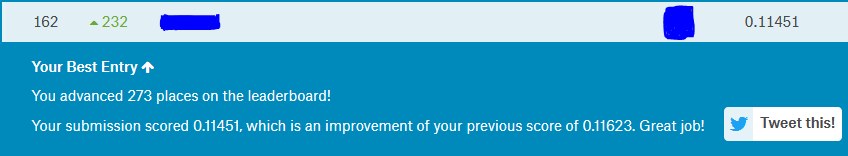

In [3]:
# Kaggle Score(Screen Shot)
from IPython.display import Image
Image('Kaggle.PNG')

**Kaggle Position:** 162 (Top 5% at the time of Submission)

## 7. Discussion
**1.** Kaggle Score shows that the Established Model is a optimized version of the Vanilla/Basic Model.<br>
**2.** Feature Engineering, Outlier Removal, Skewness Reduction and Hyper Parameter Tuning had great impact on the improvement of the Final Score.<br>
**3.** Neural Network has an Inherent Tendency to overfit. Further improvement of the Final Score is deteriorated due to this 
contingency.<br>
**4.** More Advanced Regression Techniques like XGBoost would have been fruitful for a more Generic Model.

## 8. Conclusions

**Neural Network:** Neural Network has no real Theory that explains how to choose the number of Hidden Layers except the Thumb Rule and Trial & Error procedure. It takes a lot of time when the Input Data is large, needs powerful computing machines. It is difficult to interpret the results and very hard to interpret and measure the impact of individual predictors.<br>
**The Local Minima Issue:** The Gradient Descent Algorithm produces the optimal weights for the Local Minima, the Global Minima of the Error Function is not guaranteed.